In [1]:
import os
os.getcwd()

'C:\\Users\\HP\\Documents\\data science projects\\classification project\\Diabeties_prediction'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings as wr
wr.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
data=pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#purpose of below code to check values of all 
for i in data.columns:
    print("*"*50,i,"*"*50)
    print()
    print(set(data[i].tolist()))

************************************************** Pregnancies **************************************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}
************************************************** Glucose **************************************************

{0, 44, 56, 57, 61, 62, 65, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199}
************************************************** BloodPressure ********

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data["Glucose"]=np.where(data["Glucose"]==0,data["Glucose"].median(),data["Glucose"])
data["SkinThickness"]=np.where(data["SkinThickness"]==0,data["SkinThickness"].median(),data["SkinThickness"])

In [10]:
data["BloodPressure"]=np.where(data["BloodPressure"]==0,data["BloodPressure"].median(),data["BloodPressure"])
data["Insulin"]=np.where(data["Insulin"]==0,data["Insulin"].median(),data["Insulin"])
data["BMI"]=np.where(data["BMI"]==0,data["BMI"].median(),data["BMI"])

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# outlier treatemnt

In [12]:
# only for independent variable
#split the data inpendent and dependent variable
X=data.drop(columns=["Outcome"])
y=data["Outcome"]

In [13]:
"""#not required to logistic and navi bayes theorem
def Iqr(i):
    q1=np.quantile(data[i],0.25)
    q3=np.quantile(data[i],0.75)
    iqr=q3-q1
    high=q3+1.5*iqr
    low=q1-1.5*iqr
    data[i]=np.clip(data[i],low,high)
for i in X:
    Iqr(i)
    
        
        """

'#not required to logistic and navi bayes theorem\ndef Iqr(i):\n    q1=np.quantile(data[i],0.25)\n    q3=np.quantile(data[i],0.75)\n    iqr=q3-q1\n    high=q3+1.5*iqr\n    low=q1-1.5*iqr\n    data[i]=np.clip(data[i],low,high)\nfor i in X:\n    Iqr(i)\n    \n        \n        '

# Capping method

In [14]:
# Pregnancies

Q1 = X['Pregnancies'].quantile(0.25)
Q3 = X['Pregnancies'].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(UL)
print(LL)

1.0
6.0
5.0
13.5
-6.5


In [15]:
"""for i in data:
    sns.boxplot(data[i])
    plt.show()"""
X['Pregnancies'] = np.where(X['Pregnancies'] >= UL, UL,X['Pregnancies'])

In [16]:
# At one go, we have to use capping method

Q1 =X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print(Q1)
print(Q3)
print(IQR)
print(UL)
print(LL) 

Pregnancies                  1.00000
Glucose                     99.75000
BloodPressure               64.00000
SkinThickness               23.00000
Insulin                     30.50000
BMI                         27.50000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Name: 0.25, dtype: float64
Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Name: 0.75, dtype: float64
Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                9.0000
Insulin                     96.7500
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
dtype: float64
Pregnancies                  13.500
Glucose

In [17]:
((X > UL) | (X < LL)).sum()

Pregnancies                  0
Glucose                      0
BloodPressure               14
SkinThickness               35
Insulin                     49
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
dtype: int64

In [18]:
((X > UL) | (X < LL)).sum().sum()

144

In [19]:
X[((X > UL) | (X < LL))] = np.nan

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [21]:
scaled_x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647150,0.866045,-0.010037,1.122501,-0.707637,0.217229,0.790204,1.548281
1,-0.848970,-1.205066,-0.557107,0.336142,-0.707637,-0.869731,-0.315942,-0.162527
2,1.245598,2.016662,-0.739464,-0.450216,-0.707637,-1.382155,0.970554,-0.072485
3,-0.848970,-1.073567,-0.557107,-0.450216,0.338631,-0.636811,-1.053372,-1.062953
4,-1.148194,0.504422,-2.927745,1.122501,1.557903,1.692388,NaN,0.017558


In [22]:
new_data=pd.concat([scaled_x,y],axis=1)

In [23]:
new_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.866045,-0.010037,1.122501,-0.707637,0.217229,0.790204,1.548281,1
1,-0.848970,-1.205066,-0.557107,0.336142,-0.707637,-0.869731,-0.315942,-0.162527,0
2,1.245598,2.016662,-0.739464,-0.450216,-0.707637,-1.382155,0.970554,-0.072485,1
3,-0.848970,-1.073567,-0.557107,-0.450216,0.338631,-0.636811,-1.053372,-1.062953,0
4,-1.148194,0.504422,-2.927745,1.122501,1.557903,1.692388,NaN,0.017558,1


In [24]:
new_data.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               14
SkinThickness               35
Insulin                     49
BMI                          8
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

### imputing the remaing missing value by the help of knn imputation


In [25]:
from sklearn.impute import KNNImputer

In [26]:
imputer=KNNImputer(n_neighbors=11)

In [27]:
imputed_data=pd.DataFrame(imputer.fit_transform(new_data), columns=new_data.columns)

In [28]:
imputed_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

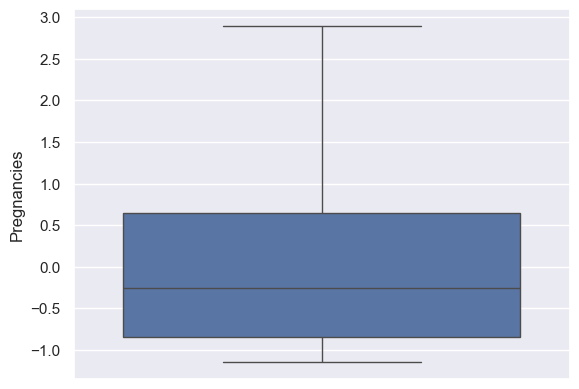

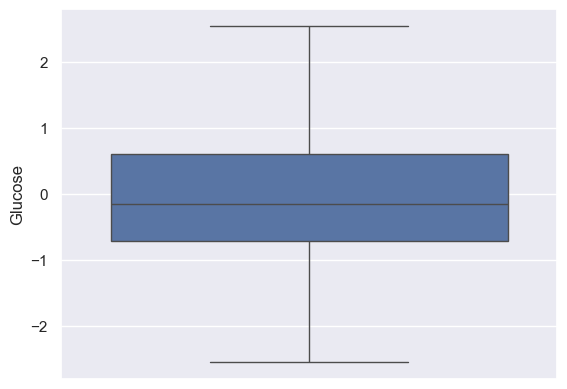

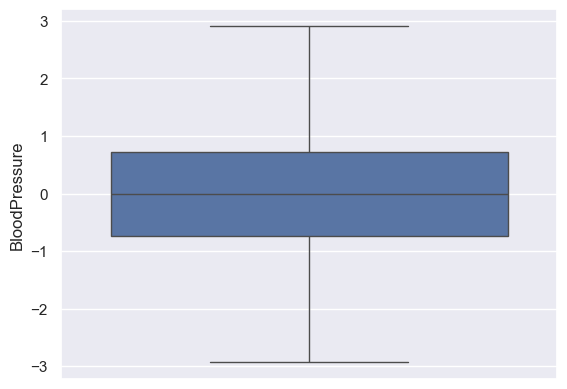

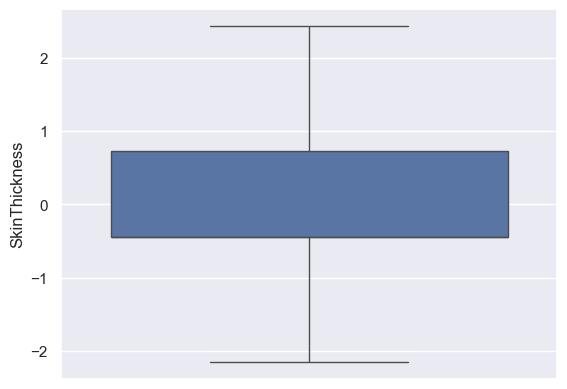

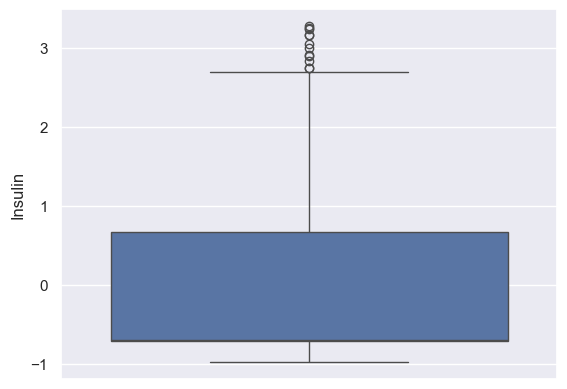

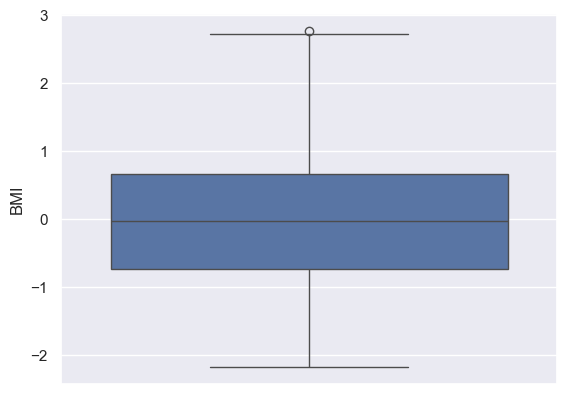

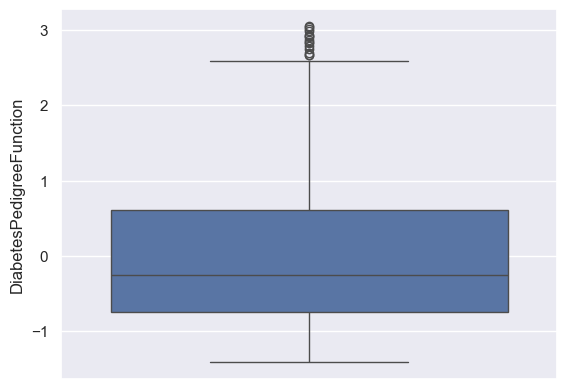

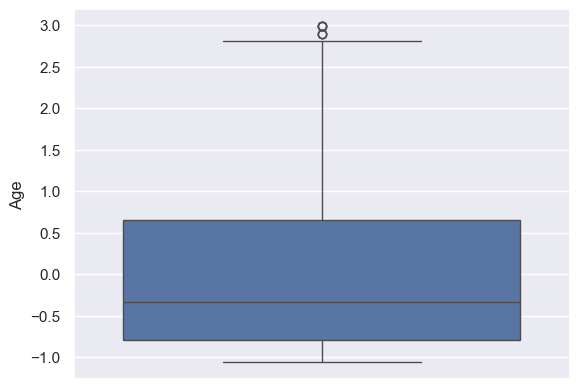

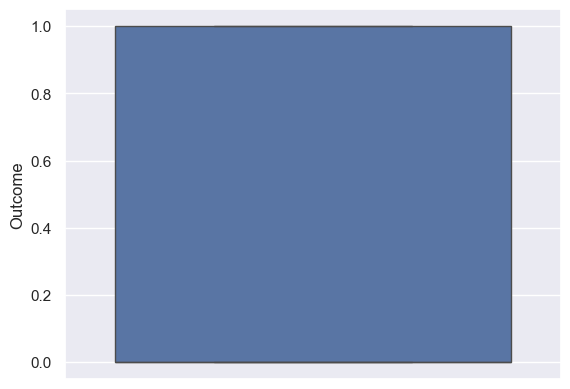

In [29]:
for i in imputed_data:
    sns.boxplot(imputed_data[i])
    plt.show()

In [30]:
# imbalanced treatment


In [31]:
imputed_data["Outcome"].value_counts(normalize=True)

Outcome
0.0    0.651042
1.0    0.348958
Name: proportion, dtype: float64

# feature selection / feature engineering

In [32]:
imputed_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.647150,0.866045,-0.010037,1.122501,-0.707637,0.217229,0.790204,1.548281,1.0
1,-0.848970,-1.205066,-0.557107,0.336142,-0.707637,-0.869731,-0.315942,-0.162527,0.0
2,1.245598,2.016662,-0.739464,-0.450216,-0.707637,-1.382155,0.970554,-0.072485,1.0
3,-0.848970,-1.073567,-0.557107,-0.450216,0.338631,-0.636811,-1.053372,-1.062953,0.0
4,-1.148194,0.504422,-2.927745,1.122501,1.557903,1.692388,0.401450,0.017558,1.0


<Axes: >

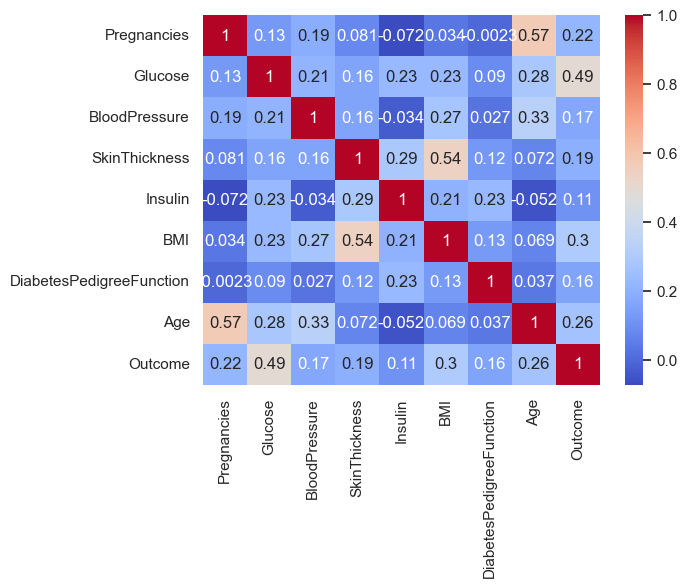

In [33]:
sns.heatmap(imputed_data.corr(), annot=True, cmap="coolwarm")


# Recursive feature elemination (feature selection approach 2)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
X=imputed_data.drop(columns=["Outcome"])

In [36]:
y=imputed_data["Outcome"]

In [37]:
#imbalanced data treatment

In [38]:
from imblearn.over_sampling import SMOTE
sampling =SMOTE()
X_re ,y_re = sampling.fit_resample(X,y)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X_re,y_re,test_size=0.25,random_state=42,stratify=y_re)


In [40]:
lr_classfication=SVC(kernel="linear")
selector=RFE(estimator=lr_classfication,n_features_to_select=4,step=1)

In [41]:
selector.fit(X_train,y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=4)

In [42]:
selector.ranking_

array([1, 1, 4, 5, 2, 1, 1, 3])

In [43]:
y_train_pred=selector.predict(X_train)

In [44]:
y_test_pred=selector.predict(X_test)


In [45]:
from sklearn import metrics

In [46]:
print(metrics.confusion_matrix(y_test,y_test_pred))
metrics.confusion_matrix(y_train,y_train_pred)


[[96 29]
 [34 91]]


array([[303,  72],
       [115, 260]], dtype=int64)

In [47]:
print(metrics.classification_report(y_test,y_test_pred))
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75       125
         1.0       0.76      0.73      0.74       125

    accuracy                           0.75       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.75      0.75      0.75       250

              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76       375
         1.0       0.78      0.69      0.74       375

    accuracy                           0.75       750
   macro avg       0.75      0.75      0.75       750
weighted avg       0.75      0.75      0.75       750



# Gradientboosting

In [48]:
selector=GradientBoostingClassifier(n_estimators=75)
selector.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=75)

In [49]:
y_train_pred=selector.predict(X_train)
y_test_pred=selector.predict(X_test)
print(metrics.confusion_matrix(y_test,y_test_pred))
metrics.confusion_matrix(y_train,y_train_pred)
print(metrics.classification_report(y_test,y_test_pred))
print(metrics.classification_report(y_train,y_train_pred))

[[ 96  29]
 [ 10 115]]
              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83       125
         1.0       0.80      0.92      0.86       125

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90       375
         1.0       0.89      0.93      0.91       375

    accuracy                           0.91       750
   macro avg       0.91      0.91      0.91       750
weighted avg       0.91      0.91      0.91       750

